In [57]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from itertools import product, chain
import importlib

import trainer, data, models
from data import gen_lin_data
from trainer import ModelingDataset, Trainer, Hyperparameters
from models import LinearRegression

In [12]:
importlib.reload(trainer)
importlib.reload(data)
importlib.reload(models)

<module 'models' from '/Users/ralph/projects/d2dl/models.py'>

In [13]:
train_X, train_y = gen_lin_data(torch.randn(3), 1.0, 8000)
val_X, val_y = gen_lin_data(torch.randn(3), 1.0, 2000)

In [14]:
train_dataset = TensorDataset(train_X, train_y)
val_dataset = TensorDataset(val_X, val_y)

In [75]:
def grid_search_params(hyperparam_grids: Hyperparameters): 
    keys = []
    grid_vals = []
    for namespace, hyperparams in hyperparam_grids.__dict__.items():
        for k, k_grid_vals in hyperparams.items():
            keys.append((namespace, k))
            grid_vals.append(k_grid_vals)

    all_val_combos = product(*grid_vals)

    all_hyperparams = []
    for all_val_combo in all_val_combos:
        hyperparams = Hyperparameters()
        for ((namespace, k), val) in zip(keys, all_val_combo):
            getattr(hyperparams, namespace)[k] = val

        all_hyperparams.append(hyperparams)

    return all_hyperparams

In [76]:
grid_search_params(Hyperparameters(
    loss=dict(
        lr=[1e-3, 2e-3, 3e-3, 4e-3, 5e-5],
        weight_decay=[0, 0.5, 1]
    ),
    general=dict(
        batch_size=[10, 50, 100]
    )
))

[Hyperparameters(loss={'lr': 0.001}, opt={}, general={'batch_size': 10}),
 Hyperparameters(loss={'lr': 0.001}, opt={}, general={'batch_size': 50}),
 Hyperparameters(loss={'lr': 0.001}, opt={}, general={'batch_size': 100}),
 Hyperparameters(loss={'lr': 0.002}, opt={}, general={'batch_size': 10}),
 Hyperparameters(loss={'lr': 0.002}, opt={}, general={'batch_size': 50}),
 Hyperparameters(loss={'lr': 0.002}, opt={}, general={'batch_size': 100})]

In [46]:
linreg_trainer = Trainer(
    model=LinearRegression(),
    dataset=ModelingDataset(train_dataset, val_dataset),
    loss=nn.MSELoss,
    opt=torch.optim.SGD,
    hyperparameters=Hyperparameters(
        general=dict(
            batch_size=100,
            num_epochs=15
        ),
        opt=dict(
            lr=1e-3,
            weight_decay=0
        )
    ),
)

/Users/ralph/.venvs/d2dl/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


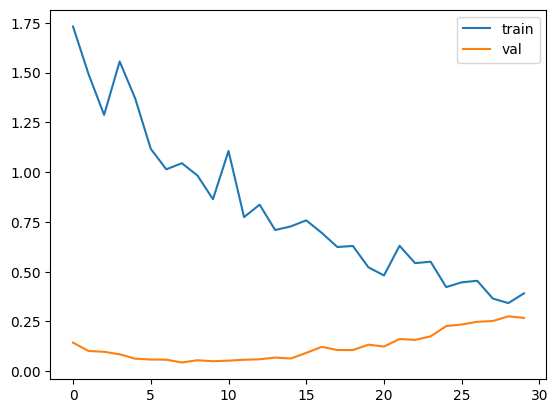

In [47]:
linreg_trainer.train(10)

In [28]:
list(linreg_trainer.model.parameters())

[Parameter containing:
 tensor([[0.1630, 0.1500, 0.2019]], requires_grad=True),
 Parameter containing:
 tensor([0.3350], requires_grad=True)]